Arshad Ali
CodeAlpha
Machine Learning
CA / DF1 / 15124
Minimum Submission Tasks = 02
ML Task 4

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Load Dataset
# Replace 'heart.csv' with the path to your dataset
data = pd.read_csv('heart.csv')

# Inspect Data
print(data.head())
print(data.info())
print(data.isnull().sum())

# Features and Target
X = data.drop('target', axis=1)  # 'target' is 1 for heart disease, 0 for no heart disease
y = data['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print(f"-----{name}-----")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
    print("\n")


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:58:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


-----XGBoost-----
Accuracy: 1.0
Confusion Matrix:
 [[100   0]
 [  0 105]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

ROC-AUC Score: 1.0




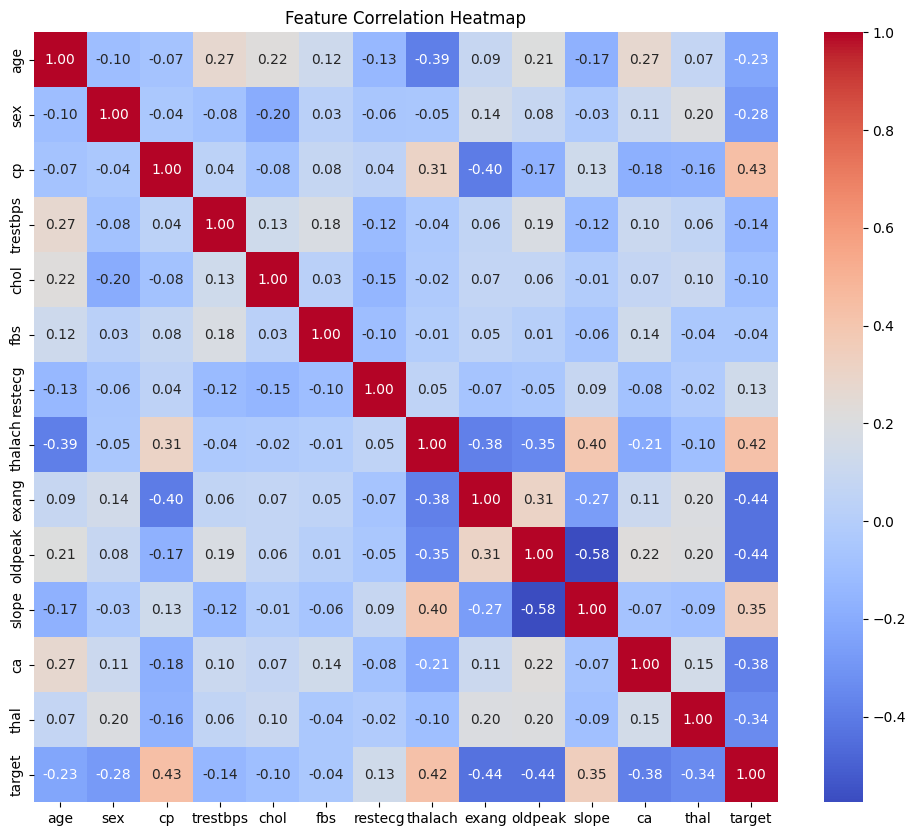

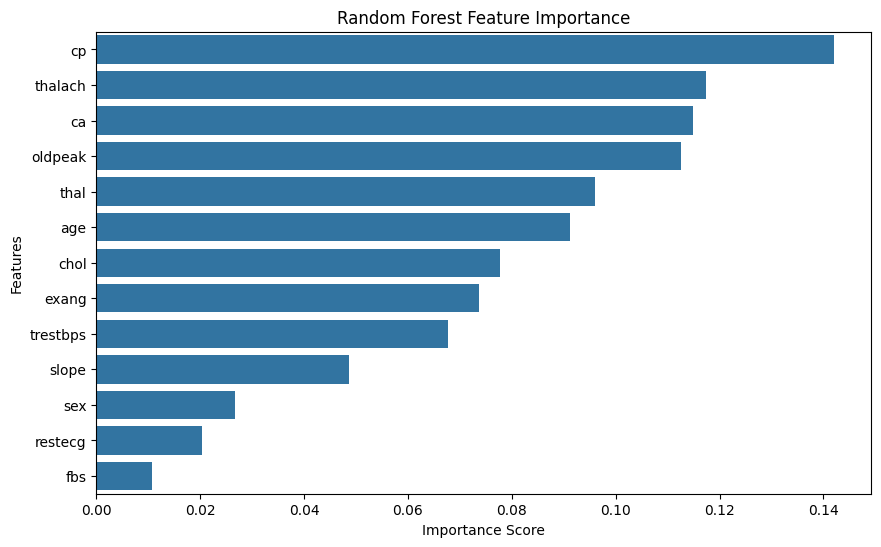

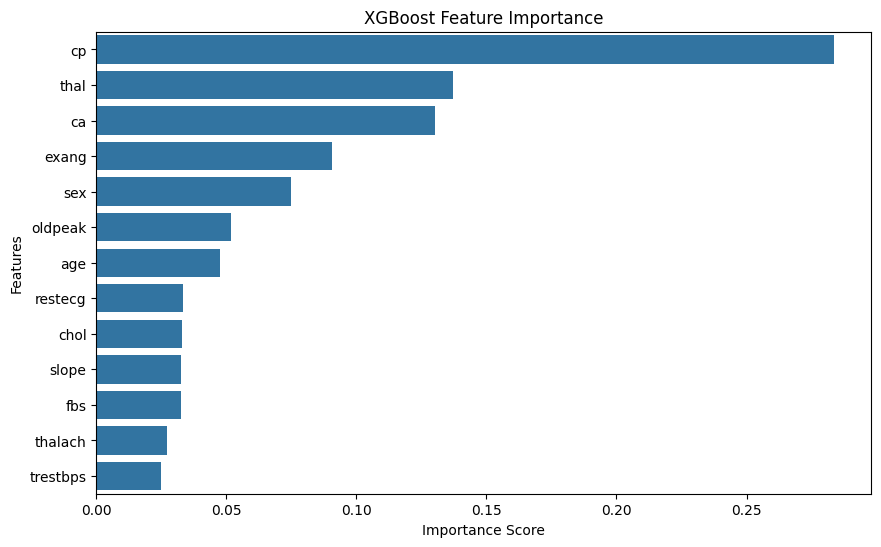

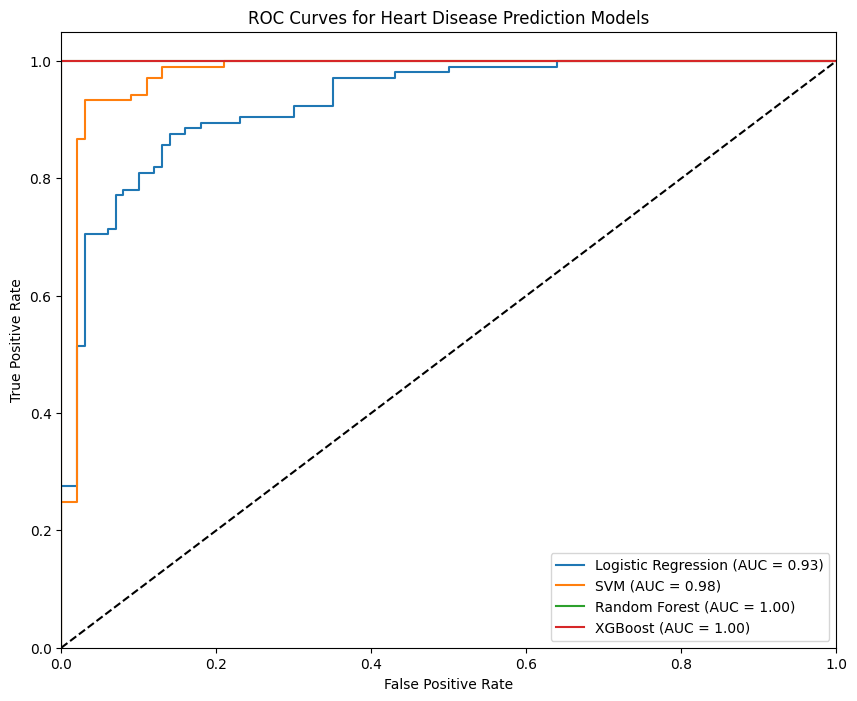

In [ ]:
# Import Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature Importance from Random Forest & XGBoost
rf_model = models['Random Forest']
xgb_model = models['XGBoost']

# Random Forest Feature Importance
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=rf_importances, y=rf_importances.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# XGBoost Feature Importance
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=xgb_importances, y=xgb_importances.index)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ROC Curves for all Models
plt.figure(figsize=(10,8))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Heart Disease Prediction Models")
plt.legend(loc="lower right")
plt.show()


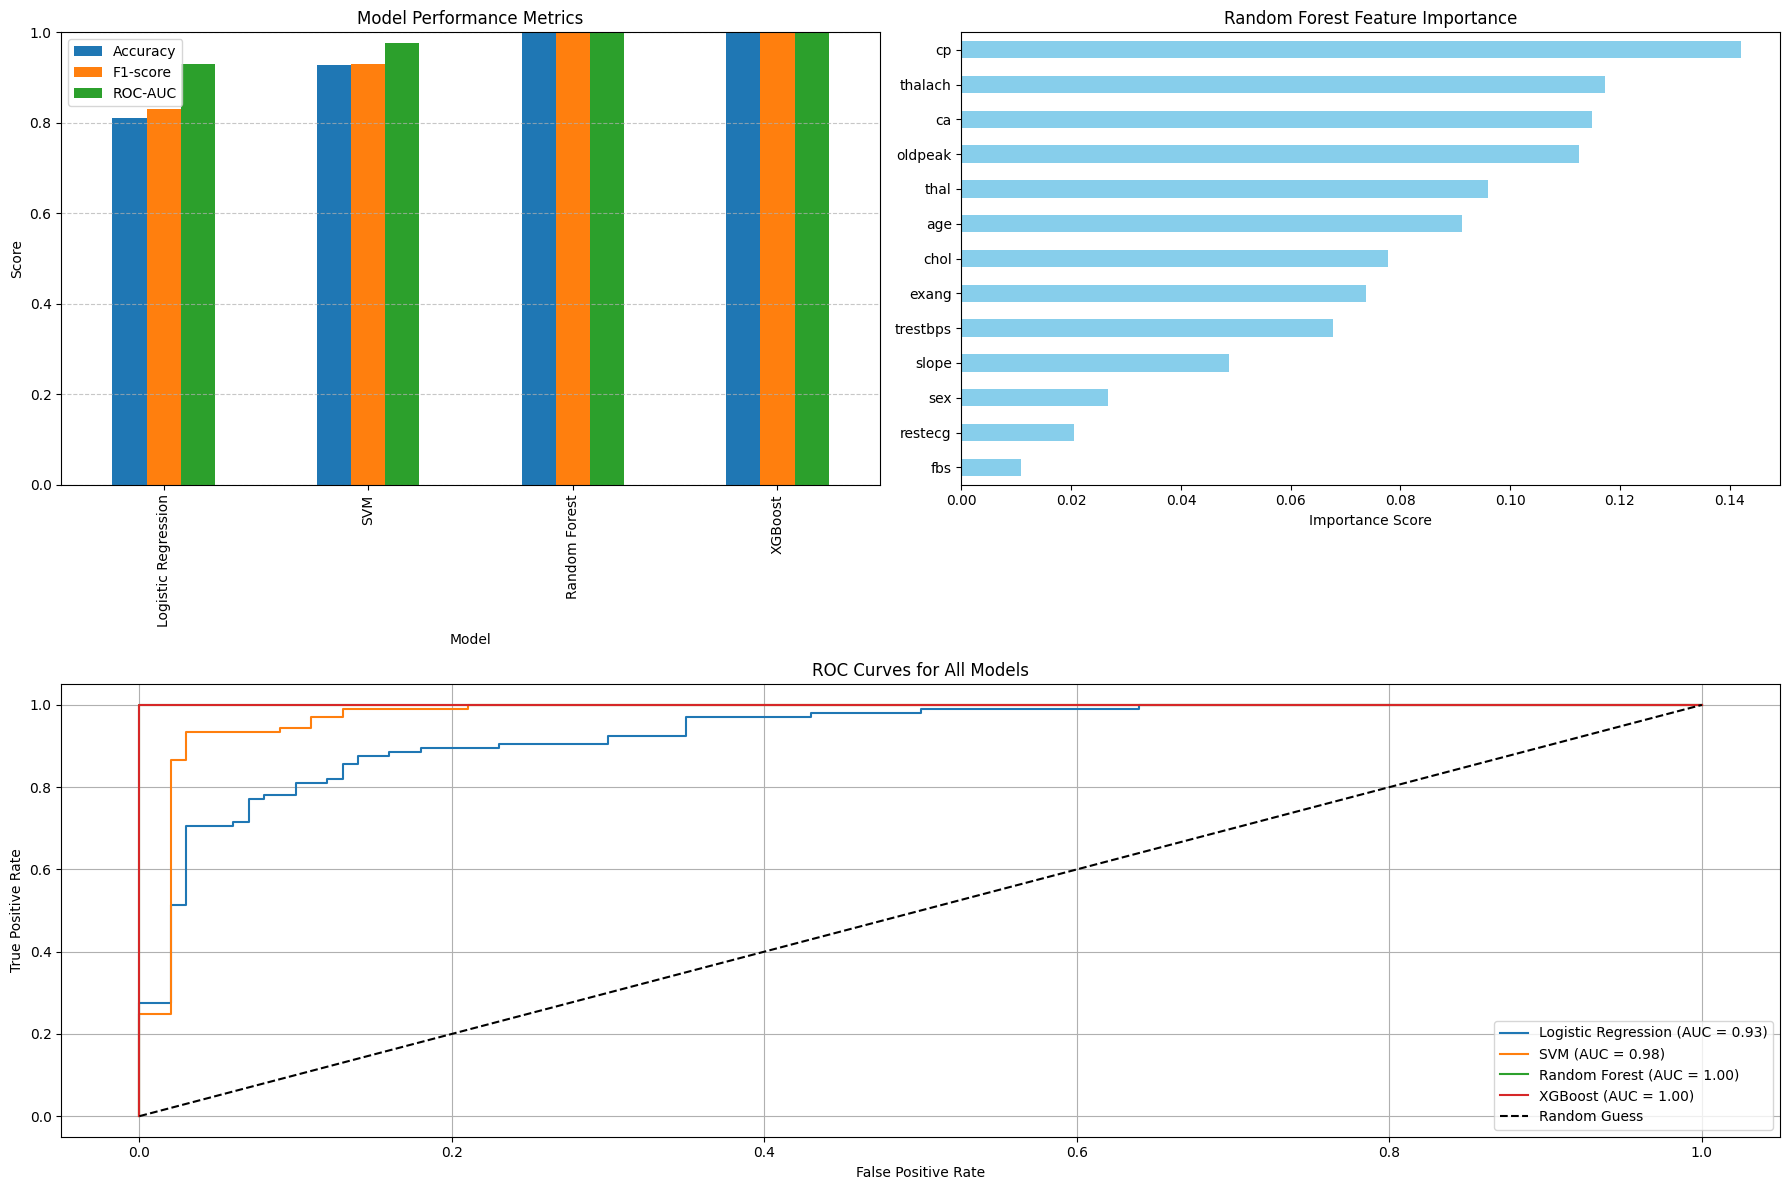

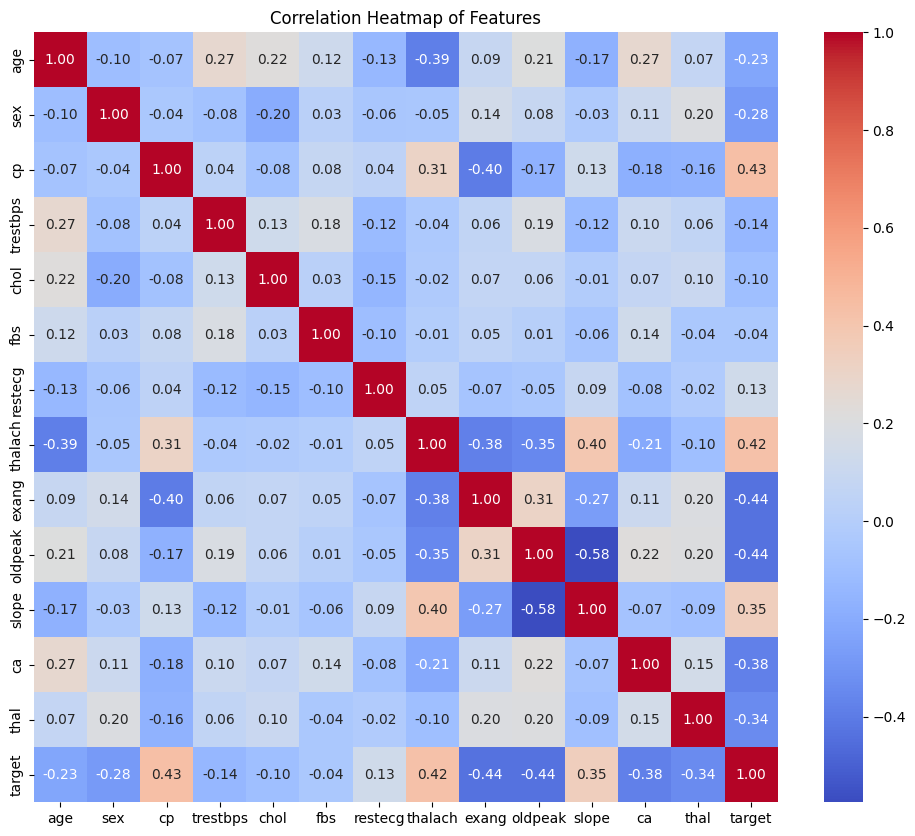

In [ ]:
# Combined Report Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

# 1. Calculate Model Metrics
model_metrics = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    model_metrics.append({'Model': name, 'Accuracy': acc, 'F1-score': f1, 'ROC-AUC': roc_auc})

metrics_df = pd.DataFrame(model_metrics)

# 2. Plot Combined Figure
plt.figure(figsize=(18,12))

# Subplot 1: Model Performance Bar Chart
plt.subplot(2,2,1)
metrics_df.set_index('Model')[['Accuracy','F1-score','ROC-AUC']].plot(kind='bar', ax=plt.gca())
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Random Forest Feature Importance
plt.subplot(2,2,2)
rf_importances = pd.Series(models['Random Forest'].feature_importances_, index=X.columns).sort_values()
rf_importances.plot(kind='barh', ax=plt.gca(), color='skyblue')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")

# Subplot 3: ROC Curves
plt.subplot(2,1,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)

plt.tight_layout()
plt.show()

# Optional: Correlation Heatmap (Separate Figure)
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()


In [ ]:
print("- ML models can accurately predict heart disease using patient data.\n"
                       "- Random Forest and XGBoost achieved highest performance.\n"
                       "- Feature importance aligns with clinical knowledge.\n"
                       "- Early prediction supports preventive care and clinical decision-making.\n\n"
                       "Future Work:\n- Expand dataset to improve generalization\n- Hyperparameter tuning and ensemble stacking\n"
                       "- Deploy as a clinical decision support tool\n- Integrate with patient monitoring systems")


- ML models can accurately predict heart disease using patient data.
- Random Forest and XGBoost achieved highest performance.
- Feature importance aligns with clinical knowledge.
- Early prediction supports preventive care and clinical decision-making.

Future Work:
- Expand dataset to improve generalization
- Hyperparameter tuning and ensemble stacking
- Deploy as a clinical decision support tool
- Integrate with patient monitoring systems
